In [3]:
import pandas as pd

from scipy.stats import spearmanr
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
genus_list = [
    "Bifidobacterium",
    "Blautia",
    "f_Lachnospiraceae",
    "Monoglobus",
    "Hungatella",
    "Flavonifractor",
    "Lachnoclostridium",
    "Parabacteroides",
]

In [5]:
x_features = genus_list
y_features = [ 'C18:0+2O','C18:0+3O', 'C18:1+O', 'C18:2+O',	'C20:3+2O','C18:3']

In [9]:
df_key = pd.read_excel('./data/Key_metabolites.xlsx', sheet_name='key_dataset')


corr_matrix = pd.DataFrame(index=x_features, columns=y_features)
pval_matrix = pd.DataFrame(index=x_features, columns=y_features)


In [10]:
for x in x_features:
    for y in y_features:
        corr, pval = spearmanr(df_key[x], df_key[y])
        corr_matrix.loc[x, y] = corr
        pval_matrix.loc[x, y] = pval

# Convert to float
corr_matrix = corr_matrix.astype(float)
pval_matrix = pval_matrix.astype(float)


In [11]:
corr_matrix

,C18:0+2O,C18:0+3O,C18:1+O,C18:2+O,C20:3+2O,C18:3
Bifidobacterium,0.497238,0.452663,0.288198,0.265626,0.543350,-0.409626
Blautia,0.646594,0.493790,0.427550,0.509413,0.619496,-0.362815
f_Lachnospiraceae,0.610756,0.810079,0.345995,0.463883,0.529522,-0.585182
Monoglobus,0.594333,0.632540,0.382071,0.360981,0.624899,-0.485655
Hungatella,-0.669662,-0.418307,-0.451697,-0.201345,-0.671517,0.395119
Flavonifractor,-0.686908,-0.496606,-0.547403,-0.638625,-0.732398,0.126615
Lachnoclostridium,-0.690929,-0.522742,-0.242431,-0.201597,-0.886389,0.325767
Parabacteroides,-0.459744,-0.428894,-0.162528,-0.217162,-0.525207,0.432656


In [12]:
pval_matrix

,C18:0+2O,C18:0+3O,C18:1+O,C18:2+O,C20:3+2O,C18:3
Bifidobacterium,0.025706,0.045059,0.217865,0.257672,1.328682e-02,0.072877
Blautia,0.002065,0.026915,0.060055,0.021778,3.579517e-03,0.115902
f_Lachnospiraceae,0.004230,0.000015,0.135096,0.039376,1.634623e-02,0.006719
Monoglobus,0.005719,0.002764,0.096428,0.117894,3.220401e-03,0.029944
Hungatella,0.001239,0.066434,0.045576,0.394640,1.186607e-03,0.084669
Flavonifractor,0.000821,0.025925,0.012483,0.002440,2.407341e-04,0.594774
Lachnoclostridium,0.000743,0.018040,0.303084,0.394038,1.969521e-07,0.161020
Parabacteroides,0.041403,0.059168,0.493583,0.357736,1.740878e-02,0.056736


In [14]:
significant_mask = pval_matrix < 0.05
significant_corrs = corr_matrix.where(significant_mask).dropna(how='all').dropna(axis=1, how='all')

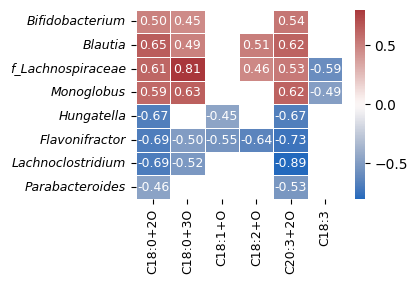

In [15]:
plt.figure(figsize=(4.2, 3))

# Draw the heatmap for significant correlations
sns.heatmap(significant_corrs, annot=True, cmap='vlag', center=0, fmt=".2f",
             linewidths=0.5, annot_kws = {'size' : 9}, vmax=0.8, vmin=-0.8)

# plt.title("Significant Spearman Correlation Heatmap (FDR < 0.05)")
plt.xticks( rotation=90, ha='center', fontsize=9)
plt.yticks(rotation=0, fontsize=9, fontstyle='italic')
plt.tight_layout()
# plt.savefig('spearman_hfa.png', dpi=600)
plt.show()